## brain

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#导入机器学习包
import sklearn
from sklearn import preprocessing #数据预处理
from sklearn.preprocessing import LabelEncoder #编码转换
from sklearn.preprocessing import StandardScaler #归一化处理
from sklearn.model_selection import StratifiedShuffleSplit #分层抽样功能
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier #梯度提升
from sklearn.ensemble import  VotingClassifier #集成学习
from sklearn.svm import SVC,LinearSVC #支持向量机
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #KNN算法
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier #决策树分类器
from sklearn.decomposition import PCA #主成分分析法
from sklearn.cluster import KMeans#聚类算法
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix#混淆矩阵
from sklearn.metrics import silhouette_score#轮廓系数
from sklearn.metrics import make_scorer #从性能指标或损失函数中创建一个记分标准
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE #随机采样处理不平衡数据问题
# from imblearn.under_sampling import RandomUnderSampler #随机采样处理数据不平衡问题

### Read Dataset

In [3]:
df = pd.read_csv("stroke_dataset.csv")

In [4]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Limpiar dato

In [6]:
# check basic information of dataset
df["age"] = df["age"].astype(float).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   int64  
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 428.2+ KB


### Manejo de valores atípicos

In [7]:
#查看数据描述统计 Ver estadísticas de descripción de datos
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.408552      0.096165       0.055210         105.943562   
std      22.683945      0.294848       0.228412          45.075373   
min       0.000000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [8]:
#删除重复值 eliminar valores duplicados
df = df.drop_duplicates()
df.shape

(4981, 11)

In [9]:
#查看数据集各列的唯一值数量 Ver la cantidad de valores únicos para cada columna del conjunto de datos
df.nunique()

gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [10]:
# 定义函数查看每一列的唯一值 Defina una función para ver los valores únicos de cada columna
discrete_data = df[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]]
def uni(columnlabel):
    print(columnlabel,"-----",discrete_data[columnlabel].unique())
# 查看每一列的唯一值 Ver valores únicos para cada columna
for i in range(0,len(discrete_data.columns)):
    uni(discrete_data.columns[i])

gender ----- ['Male' 'Female']
hypertension ----- [0 1]
heart_disease ----- [1 0]
ever_married ----- ['Yes' 'No']
work_type ----- ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ----- ['Urban' 'Rural']
smoking_status ----- ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke ----- [1 0]


In [11]:
# check any mmissing values present in dataset or not
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [13]:
#将吸烟状态的异常值替换为空值 Reemplace los valores atípicos para el estado de fumador con valores nulos
df["smoking_status"].replace("Unknown",np.nan,inplace=True)
#用众数填充缺失值 Rellena los valores que faltan con la moda
df["smoking_status"].fillna(df["smoking_status"].mode()[0],inplace=True)
df.smoking_status.value_counts()

never smoked       3338
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

### Exploratory Data Analysis (EDA)

#### Análisis Preliminar de Variables Discretas

In [14]:
#设置可视化数据列的百分比 Establecer el porcentaje de una columna de datos de visualización
def annot_plot(ax):
    ax.spines["top"].set_visible(False)#设置顶部边框为空
    ax.spines["right"].set_visible(False) #设置右侧边框为空
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")


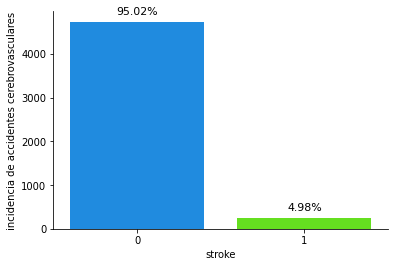

In [15]:
#数据集分布情况
ax = sns.countplot(x="stroke",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

#### Conclusión: 
los usuarios de accidentes cerebrovasculares solo representan el 4,98%, y se puede ver que la distribución del conjunto de datos es desigual, por lo que se requiere un muestreo estratificado cuando los datos se dividen en conjuntos de datos de entrenamiento y prueba, y los datos deben procesarse SMOTE .

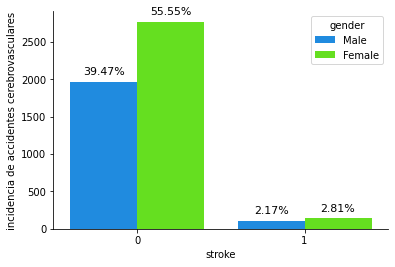

In [16]:
ax = sns.countplot(x="stroke",hue="gender",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
annot_plot(ax)
plt.show()

#### Conclusión: 
La figura muestra que la proporción de mujeres con la enfermedad es menor, pero la proporción de mujeres que no tienen la enfermedad también es menor. Debido a que la cantidad de hombres y mujeres en el conjunto de datos varía, es imposible juzgar directamente que los hombres son más propensos a la enfermedad.

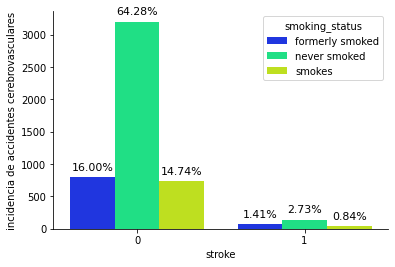

In [17]:
ax = sns.countplot(x="stroke",hue="smoking_status",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
annot_plot(ax)
plt.show()

#### Comparación:
las personas que no se reúnen en reuniones muestran que la enfermedad representa una proporción relativamente grande, y la no ocupación también representa la mayoría. Los datos allí son más y el rango de cantidad varía, lo cual es fácil. Por lo tanto, es Es fácil juzgar directamente si hay una enfermedad.

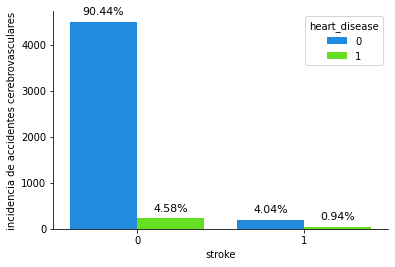

In [18]:
ax = sns.countplot(x="stroke",hue="heart_disease",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
annot_plot(ax)
plt.show()

#### Conclusión: 
la figura muestra que los usuarios sin enfermedad cardíaca representan una gran proporción de la enfermedad, pero la proporción de usuarios sin enfermedad cardíaca sin enfermedad cardíaca también representa la mayor parte del duelo. Debido a que la cantidad de personas con enfermedad cardíaca en los datos El conjunto varía, es imposible determinar directamente si la enfermedad cardíaca no lo es. Es más probable que la enfermedad cause un accidente cerebrovascular.

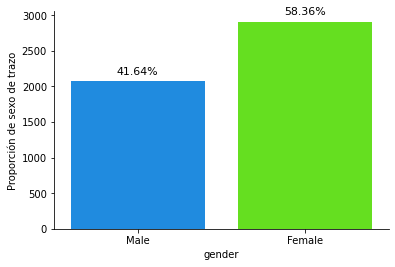

Female    2907
Male      2074
Name: gender, dtype: int64

In [19]:
# male and female
ax = sns.countplot(x=df.gender,data=df, palette="gist_rainbow_r")
plt.ylabel("Proporción de sexo de trazo")
annot_plot(ax)
plt.show()
df.gender.value_counts()

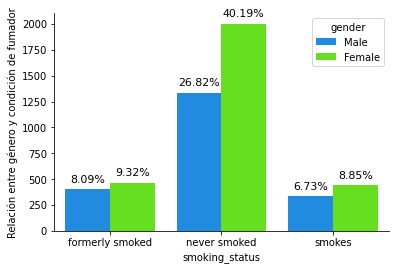

In [20]:
# smoking_status 
ax = sns.countplot(x = df.smoking_status,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("Relación entre género y condición de fumador")
annot_plot(ax)
plt.show()

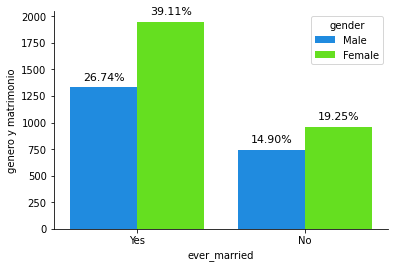

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [21]:
# ever_married
ax = sns.countplot(x = df.ever_married, hue= df.gender,data=df, palette="gist_rainbow_r")
plt.ylabel("genero y matrimonio")
annot_plot(ax)
plt.show()
df.ever_married.value_counts()

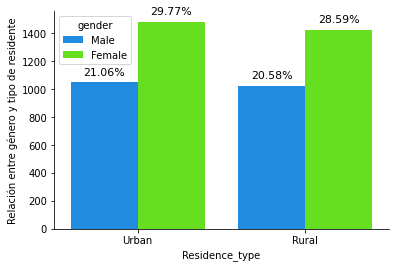

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [22]:
# Residence_type
ax = sns.countplot(x = df.Residence_type,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("Relación entre género y tipo de residente")
annot_plot(ax)
plt.show()
df.Residence_type.value_counts()

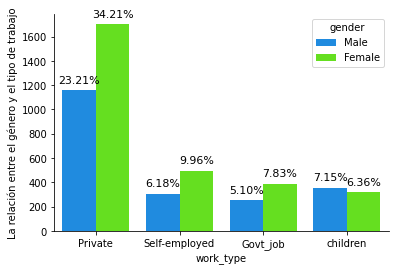

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [23]:
# work_type
ax = sns.countplot(x = df.work_type,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el género y el tipo de trabajo")
annot_plot(ax)
plt.show()
df.work_type.value_counts()

#### Para los valores atípicos del estado de tabaquismo, de acuerdo con el estado de vida real, elegimos el modo del conjunto de datos para reemplazar, primero reemplazamos el valor desconocido con el valor nulo y luego completamos el valor nulo con el modo.

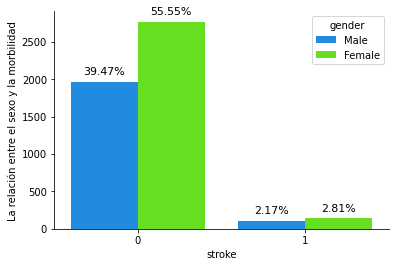

0    4733
1     248
Name: stroke, dtype: int64

In [24]:
# stroke 
#性别与发病率的关系
ax = sns.countplot(x = df.stroke,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el sexo y la morbilidad")
annot_plot(ax)
plt.show()
df.stroke.value_counts()

#### Conclusión:
La figura muestra que la proporción de mujeres con la enfermedad es menor, pero la proporción de mujeres que no tienen la enfermedad también es menor. Debido a que la cantidad de hombres y mujeres en el conjunto de datos varía, es imposible juzgar directamente que los hombres son más propensos a la enfermedad.

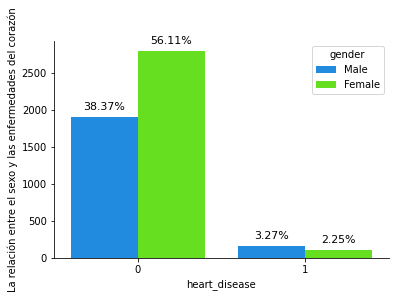

0    4706
1     275
Name: heart_disease, dtype: int64

In [25]:
# heart_disease 
ax = sns.countplot(x = df.heart_disease,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el sexo y las enfermedades del corazón")
annot_plot(ax)
plt.show()
df.heart_disease.value_counts()

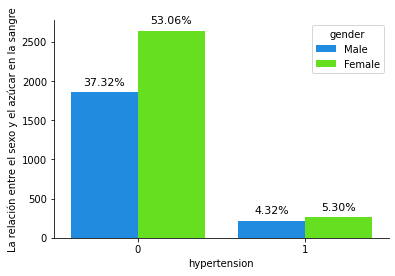

0    4502
1     479
Name: hypertension, dtype: int64

In [26]:
# hypertension 
ax = sns.countplot(x = df.hypertension,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el sexo y el azúcar en la sangre")
annot_plot(ax)
plt.show()
df.hypertension.value_counts()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


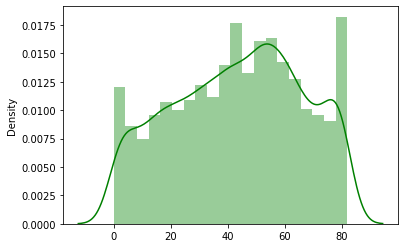

In [27]:
# age
sns.distplot(x = df.age, color="g")
plt.show()

### Análisis Preliminar de Variables Continuas

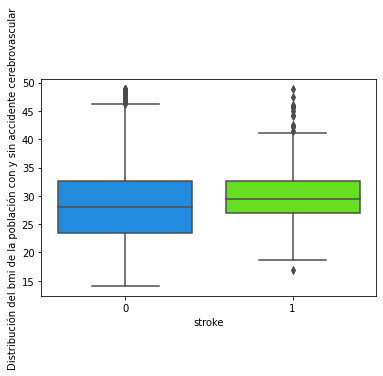

In [28]:
#bmi箱线图
sns.boxplot(x="stroke",y="bmi",data=df, palette='gist_rainbow_r')
plt.ylabel("Distribución del bmi de la población con y sin accidente cerebrovascular")
plt.show()

<AxesSubplot:ylabel='Density'>

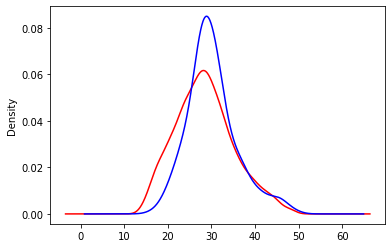

In [29]:
#bmi分布密度图
df["bmi"].plot.kde(color="red")
#患病用户密度分布
df.query("stroke==1")["bmi"].plot.kde(color="blue")

#### Conclusión: 
La distribución del bmi de las personas sin ictus tiene valores más discretos, mientras que el bmi de las personas con ictus está relativamente concentrado en un intervalo.

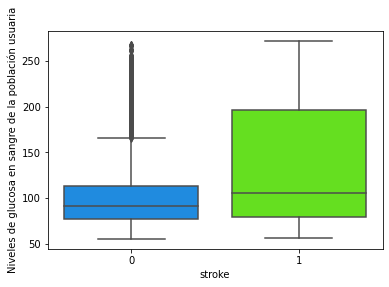

In [30]:
#血液中的葡萄糖水平的分布
sns.boxplot(x="stroke",y="avg_glucose_level",data=df, palette='gist_rainbow_r')
plt.ylabel("Niveles de glucosa en sangre de la población usuaria")
plt.show()

<AxesSubplot:ylabel='Density'>

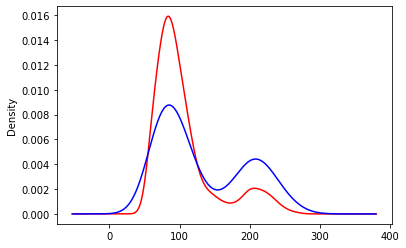

In [31]:
#avg_glucose_level分布密度图
df["avg_glucose_level"].plot.kde(color="red")
#患病用户密度分布
df.query("stroke==1")["avg_glucose_level"].plot.kde(color="blue")

#### Conclusión: 
Se puede observar que la población discreta de usuarios sin ictus está más distribuida, mientras que el nivel de glucosa en sangre de la población con ictus se distribuye en un intervalo relativamente estable.

### Extraer características

In [32]:
#提取特征
charges = df.drop(["stroke"],axis=1)
corrDf = charges.apply(lambda x:pd.factorize(x)[0])
corrDf.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       0    0             0              0             0          0   
1       0    1             0              0             0          0   
2       1    2             0              1             0          0   
3       1    3             1              1             0          1   
4       0    4             0              1             0          0   

   Residence_type  avg_glucose_level  bmi  smoking_status  
0               0                  0    0               0  
1               1                  1    1               1  
2               0                  2    2               2  
3               1                  3    3               1  
4               0                  4    4               0

In [33]:
#构造相关性矩阵
corr=corrDf.corr()
corr

gender       age  hypertension  heart_disease  \
gender             1.000000 -0.012168     -0.021485       0.086476   
age               -0.012168  1.000000     -0.227529       0.210886   
hypertension      -0.021485 -0.227529      1.000000      -0.111974   
heart_disease      0.086476  0.210886     -0.111974       1.000000   
ever_married      -0.028971  0.537537     -0.164534       0.114765   
work_type         -0.063684  0.271470     -0.073155       0.056632   
Residence_type    -0.004301  0.023700      0.004755       0.002125   
avg_glucose_level -0.003350  0.041936     -0.026456       0.019200   
bmi                0.011963  0.140965     -0.019053       0.070082   
smoking_status     0.021362  0.085377     -0.018090       0.016808   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.028971  -0.063684       -0.004301          -0.003350   
age                    0.537537   0.271470        0.023700           0.041936   
hypertension          -0.164534  -0.073155        0.004755          -0.026456   
heart_disease          0.114765   0.056632        0.002125           0.019200   
ever_married           1.000000   0.365538        0.008191           0.016706   
work_type              0.365538   1.000000       -0.008475           0.017066   
Residence_type         0.008191  -0.008475        1.000000           0.001438   
avg_glucose_level      0.016706   0.017066        0.001438           1.000000   
bmi                    0.120293   0.196876       -0.036646           0.077228   
smoking_status         0.046520  -0.019969       -0.012773           0.006505   

                        bmi  smoking_status  
gender             0.011963        0.021362  
age                0.140965        0.085377  
hypertension      -0.019053       -0.018090  
heart_disease      0.070082        0.016808  
ever_married       0.120293        0.046520  
work_type          0.196876       -0.019969  
Residence_type    -0.036646       -0.012773  
avg_glucose_level  0.077228        0.006505  
bmi                1.000000       -0.004289  
smoking_status    -0.004289        1.000000

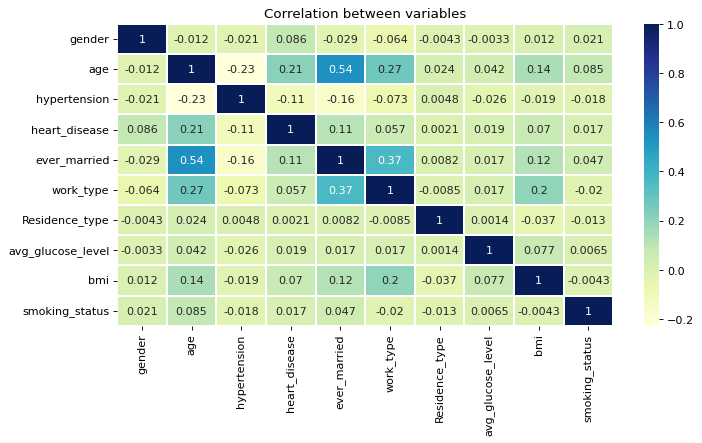

In [34]:
#绘制相关系数热力地图
plt.figure(figsize=(10,5),dpi=80)
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
                linewidths=0.2,cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")
plt.show()

#### Conclusión: 
A partir de la figura anterior, se puede ver que la edad, el tipo de trabajo, el estado civil, las enfermedades cardíacas, la hipertensión y el tabaquismo tienen correlaciones relativamente fuertes.

In [35]:
#使用one_hot编码查看数据之间的关系 Use la codificación one_hot para ver la relación entre los datos
one_hot_data = pd.get_dummies(df.iloc[:,1:])
one_hot_data.head(2)

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   67             0              1             228.69  36.6       1   
1   80             0              1             105.92  32.5       1   

   ever_married_No  ever_married_Yes  work_type_Govt_job  work_type_Private  \
0                0                 1                   0                  1   
1                0                 1                   0                  1   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                        0                   0                     0   
1                        0                   0                     1   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0

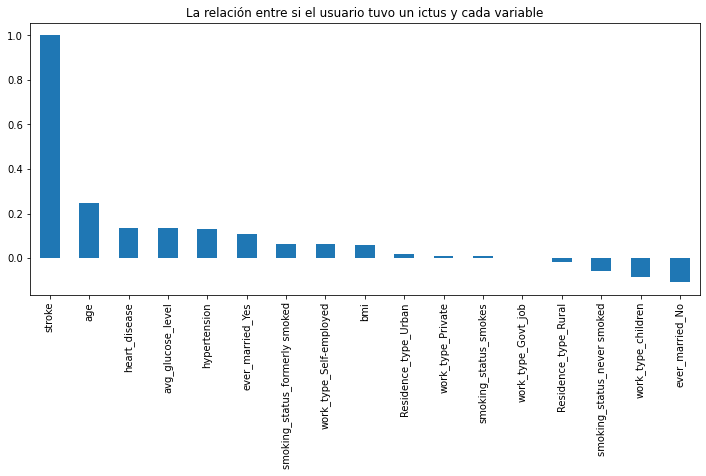

In [36]:
#用户是否有中风与各变量之间的关系
plt.figure(figsize=(12,5))
one_hot_data.corr()["stroke"].sort_values(ascending=False).plot(kind="bar")
plt.title("La relación entre si el usuario tuvo un ictus y cada variable")
plt.show()

#### Conclusión:
Se puede observar que la relación entre accidente cerebrovascular y género y tipo de residencia es pequeña, lo que directamente se puede descartar, por el alto coeficiente de correlación entre situación laboral y freelance se mantiene.

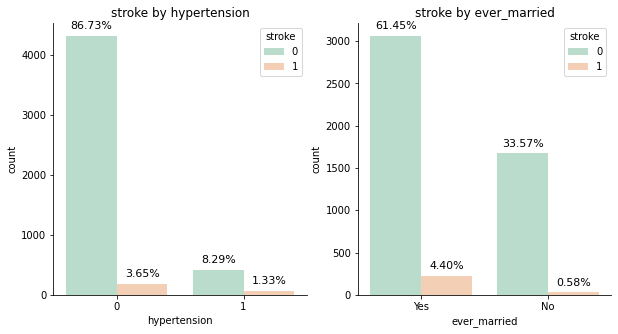

In [37]:
#中风与高血压和婚姻状态的关系
coveriables=["hypertension","ever_married"]
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for i,item in enumerate(coveriables): #enumerate()函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    plt.subplot(1,2,(i+1))
    ax = sns.countplot(x=item,hue="stroke",data=df,palette="Pastel2")
    plt.xlabel(str(item))
    plt.title("stroke by "+str(item))
    i=i+1
    annot_plot(ax)
plt.show()

<AxesSubplot:xlabel='age'>

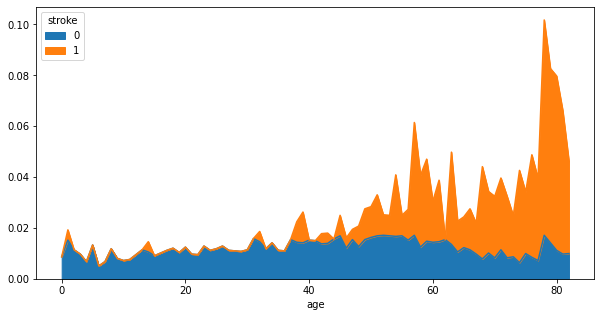

In [38]:
#求百分比绘图,更能准确反应区别
n = len(df)+1
nlist = range(1,n)
df['id'] = nlist

age_data = df.pivot_table(index="age",columns="stroke",values="id",aggfunc="count")
age_data = age_data.apply(lambda x:x/x.sum())
#绘制堆积面积图
age_data.plot.area(figsize=(10,5))

#### Conclusión: 
Se puede observar que con el aumento de la edad, la probabilidad de que un usuario sufra un ictus aumenta paulatinamente, tomando como límite los 40 años, a mayor edad mayor probabilidad de ictus.
#### Para resumir: 
seleccionamos todas las características excepto el género y el tipo de residencia para la formación modelo

### Procesamiento de datos de características

In [39]:
data_comvar = df.drop(["id","gender","Residence_type","stroke"],axis=1)
data_comvar.head(5)

age  hypertension  heart_disease ever_married      work_type  \
0   67             0              1          Yes        Private   
1   80             0              1          Yes        Private   
2   49             0              0          Yes        Private   
3   79             1              0          Yes  Self-employed   
4   81             0              0          Yes        Private   

   avg_glucose_level   bmi   smoking_status  
0             228.69  36.6  formerly smoked  
1             105.92  32.5     never smoked  
2             171.23  34.4           smokes  
3             174.12  24.0     never smoked  
4             186.21  29.0  formerly smoked

In [40]:
#对连续变量进行标准化处理 Estandarizar Variables Continuas
scaler = StandardScaler(copy=False)
#fit_transform()先拟合数据，然后转化数据将其变成标准形式 Ajuste los datos primero, luego transforme los datos en una forma estándar
scaler.fit_transform(data_comvar[["age","avg_glucose_level","bmi"]])

array([[ 1.04011079e+00,  2.72341090e+00,  1.19323816e+00],
       [ 1.61326088e+00, -5.22766599e-04,  5.89389611e-01],
       [ 2.46518357e-01,  1.44852918e+00,  8.69221866e-01],
       ...,
       [ 7.01644829e-02, -2.42364234e-01,  4.86293516e-01],
       [-1.50277859e-01, -4.88199415e-01,  2.21189274e-01],
       [ 1.61326088e+00, -4.92415000e-01,  8.86371531e-02]])

In [41]:
#替换数据
data_comvar[["age","avg_glucose_level","bmi"]] = scaler.fit_transform(data_comvar[["age","avg_glucose_level","bmi"]])
data_comvar[["age","avg_glucose_level","bmi"]]

age  avg_glucose_level       bmi
0     1.040111           2.723411  1.193238
1     1.613261          -0.000523  0.589390
2     0.246518           1.448529  0.869222
3     1.569172           1.512650 -0.662492
4     1.657349           1.780895  0.073909
...        ...                ...       ...
4976 -0.106189          -0.794162  0.191733
4977 -0.150278           1.890500  0.383197
4978  0.070164          -0.242364  0.486294
4979 -0.150278          -0.488199  0.221189
4980  1.613261          -0.492415  0.088637

[4981 rows x 3 columns]

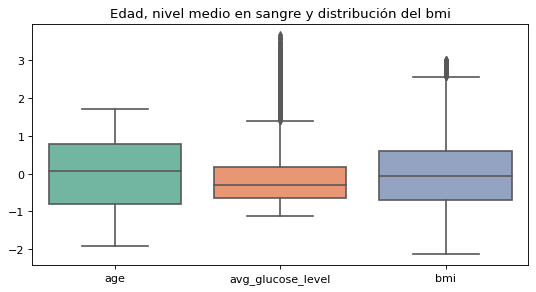

In [42]:
#使用箱线图查看是否存在异常值 Use un diagrama de caja para ver si hay valores atípicos
plt.figure(figsize=(8,4),dpi=80)
numbox=sns.boxplot(data=data_comvar[["age","avg_glucose_level","bmi"]],palette="Set2")
plt.title("Edad, nivel medio en sangre y distribución del bmi")
plt.show()

Hay muchos valores atípicos en el índice de avg_glucose_level, pero no necesariamente son valores atípicos. También hay algunos valores atípicos en bmi, y la distribución por edades es normal. Aquí, para entrenar el modelo, eliminamos los valores que son tanto en sangre como en sangre. niveles de glucosa y valores atípicos de bmi.

In [43]:
def detect_outliers(data,n,features):
    outlier_indices=[]
    for col in features:
        #第一个四分位点
        #Q1 = data[col].describe()["25%"]
        Q1=np.percentile(data[col],25)
        #第三个四分卫点
        #Q3 = data[col].describe()["75%"]
        Q3=np.percentile(data[col],75)
        IQR = Q3-Q1
        #极端上限和下限
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        #查询异常值的索引
        outlier_col = data[(data[col]<lower_limit)|(data[col]>upper_limit)].index
        #保存
        outlier_indices.extend(outlier_col)
    from collections import Counter
    outlier_indices = Counter(outlier_indices)
    #若被n特特征同时判定为异常点才输出
    more_outliers = list(k for k,v in outlier_indices.items() if v>=n)
    return more_outliers

In [44]:
#异常值的索引 índice de valores atípicos
outliers = detect_outliers(data_comvar,2,["avg_glucose_level","bmi"])
outliers

[17, 53, 154, 368, 1411, 2116, 2683, 3341, 3683, 3994, 4329]

### eliminar valores atípicos

In [45]:
#Eliminar valores atípicos de conjuntos de datos de entidades
data_comvar = data_comvar.drop(outliers,axis=0).reset_index(drop=True)
data_comvar.head(2)

age  hypertension  heart_disease ever_married work_type  \
0  1.040111             0              1          Yes   Private   
1  1.613261             0              1          Yes   Private   

   avg_glucose_level       bmi   smoking_status  
0           2.723411  1.193238  formerly smoked  
1          -0.000523  0.589390     never smoked

In [46]:
#Eliminar valores atípicos del conjunto de datos original
data = df.drop(outliers,axis=0).reset_index(drop=True)
data.head(2)

gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   
1   Male   80             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  id  
0          Urban             228.69  36.6  formerly smoked       1   1  
1          Rural             105.92  32.5     never smoked       1   2

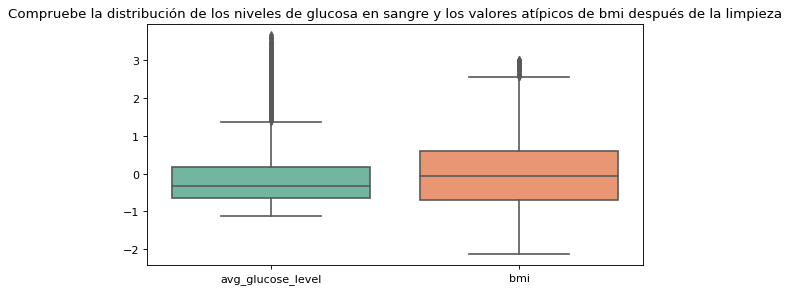

In [47]:
#检查异常值是否清理完成 Comprobar si los valores atípicos se limpian
plt.figure(figsize=(8,4),dpi=80)
numbox = sns.boxplot(data = data_comvar[["avg_glucose_level","bmi"]],palette="Set2")
plt.title("Compruebe la distribución de los niveles de glucosa en sangre y los valores atípicos de bmi después de la limpieza")
plt.show()

In [48]:
#查看对象类型字段里面存在的值
#Ver el valor que existe en el tipo de objeto
def uni(columnlabel):
    print(columnlabel,"-----",data_comvar[columnlabel].unique())
data_comvar_object = data_comvar.select_dtypes(["object"])
for i in range(0,len(data_comvar_object.columns)):
    uni(data_comvar_object.columns[i])

ever_married ----- ['Yes' 'No']
work_type ----- ['Private' 'Self-employed' 'Govt_job' 'children']
smoking_status ----- ['formerly smoked' 'never smoked' 'smokes']


#### Regularización y etiquetado de datos

In [49]:
#使用scikit_learn标签编码，将分类数据转换为整数编码
def labelencode(columnlabel):
    data_comvar[columnlabel] = LabelEncoder().fit_transform(data_comvar[columnlabel])
#进行标签编码：
for i in range(0,len(data_comvar_object.columns)):
    labelencode(data_comvar_object.columns[i])
#展示
for i in range(0,len(data_comvar_object.columns)):
    uni(data_comvar_object.columns[i])

ever_married ----- [1 0]
work_type ----- [1 2 0 3]
smoking_status ----- [0 1 2]


In [50]:
data_comvar.head()


age  hypertension  heart_disease  ever_married  work_type  \
0  1.040111             0              1             1          1   
1  1.613261             0              1             1          1   
2  0.246518             0              0             1          1   
3  1.569172             1              0             1          2   
4  1.657349             0              0             1          1   

   avg_glucose_level       bmi  smoking_status  
0           2.723411  1.193238               0  
1          -0.000523  0.589390               1  
2           1.448529  0.869222               2  
3           1.512650 -0.662492               1  
4           1.780895  0.073909               0

### Construye el modelo

In [53]:
X=data_comvar
y=data["stroke"].values

spl = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
print(spl)
print("El número de grupos en los que se dividen los conjuntos de datos de entrenamiento y prueba：",spl.get_n_splits(X,y))

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
El número de grupos en los que se dividen los conjuntos de datos de entrenamiento y prueba： 5


In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)


In [58]:
#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (3976, 8)
y_train shape: (3976,)
X_test shape: (994, 8)
y_test: (994,)


In [65]:
#Usando SMOTE para lidiar con el problema del desequilibrio de datos
smo = SMOTE(random_state=42)
x_smo,y_smo = smo.fit_resample(X_train,y_train)
print(x_smo.shape,y_smo.shape)

(6596, 8) (6596,)


### Elija un modelo de algoritmo

In [70]:
Classifiers=[
    ["Random Forest",RandomForestClassifier()],
    ["Support Vector Machine",SVC()],
    ["LogisticRegression",LogisticRegression()],
    ["KNN",KNeighborsClassifier()],
    ["Naive Bayes",GaussianNB()],
    ["Decision Tree",DecisionTreeClassifier()],
    ["AdaBoostClassifier",AdaBoostClassifier()],
    ["GradientBoostingClassifier",GradientBoostingClassifier()],
    ["XGB",XGBClassifier()],
    ["CatBoost",CatBoostClassifier()]
]

### Sustituir los datos de entrenamiento para entrenar el modelo

In [75]:
#训练模型
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier = classifier
    #训练模型
    classifier.fit(x_smo,y_smo)
    #目标预测值
    y_pred = classifier.predict(X_test)
    #召回率
    recall = recall_score(y_test,y_pred)
    #准确率
    precision = precision_score(y_test,y_pred)
    #f1综合得分
    f1 = f1_score(y_test,y_pred)
    #准确度
    accuracy=accuracy_score(y_test,y_pred)
    #评估结果合并
    class_eva = pd.DataFrame([recall,precision,f1,accuracy])
    Classify_result.append(class_eva)
    #模型名称
    name=pd.Series(name)
    names.append(name)
    #预测结果
    y_pred = pd.Series(y_pred)
    prediction.append(y_pred)

Learning rate set to 0.023055
0:	learn: 0.6798120	total: 5.71ms	remaining: 5.7s
1:	learn: 0.6677408	total: 9.84ms	remaining: 4.91s
2:	learn: 0.6555688	total: 13ms	remaining: 4.32s
3:	learn: 0.6442200	total: 16.5ms	remaining: 4.12s
4:	learn: 0.6306220	total: 19.5ms	remaining: 3.88s
5:	learn: 0.6200710	total: 22.5ms	remaining: 3.73s
6:	learn: 0.6102209	total: 25.9ms	remaining: 3.67s
7:	learn: 0.6000638	total: 29ms	remaining: 3.59s
8:	learn: 0.5912234	total: 32.5ms	remaining: 3.58s
9:	learn: 0.5824152	total: 35.8ms	remaining: 3.55s
10:	learn: 0.5737445	total: 40.4ms	remaining: 3.63s
11:	learn: 0.5660300	total: 44.8ms	remaining: 3.69s
12:	learn: 0.5574727	total: 49.3ms	remaining: 3.75s
13:	learn: 0.5509804	total: 53.4ms	remaining: 3.76s
14:	learn: 0.5448103	total: 57ms	remaining: 3.74s
15:	learn: 0.5385222	total: 59.9ms	remaining: 3.69s
16:	learn: 0.5323218	total: 63.2ms	remaining: 3.66s
17:	learn: 0.5260961	total: 66.4ms	remaining: 3.63s
18:	learn: 0.5214479	total: 69.4ms	remaining: 3.58s

170:	learn: 0.3340647	total: 1.08s	remaining: 5.23s
171:	learn: 0.3336574	total: 1.08s	remaining: 5.21s
172:	learn: 0.3331417	total: 1.09s	remaining: 5.2s
173:	learn: 0.3328736	total: 1.09s	remaining: 5.18s
174:	learn: 0.3322692	total: 1.09s	remaining: 5.16s
175:	learn: 0.3318665	total: 1.1s	remaining: 5.14s
176:	learn: 0.3314156	total: 1.1s	remaining: 5.13s
177:	learn: 0.3308748	total: 1.11s	remaining: 5.13s
178:	learn: 0.3306198	total: 1.13s	remaining: 5.17s
179:	learn: 0.3302936	total: 1.13s	remaining: 5.16s
180:	learn: 0.3298570	total: 1.14s	remaining: 5.14s
181:	learn: 0.3293209	total: 1.14s	remaining: 5.13s
182:	learn: 0.3288782	total: 1.15s	remaining: 5.11s
183:	learn: 0.3282372	total: 1.15s	remaining: 5.1s
184:	learn: 0.3276751	total: 1.15s	remaining: 5.09s
185:	learn: 0.3272343	total: 1.16s	remaining: 5.07s
186:	learn: 0.3265652	total: 1.17s	remaining: 5.09s
187:	learn: 0.3261637	total: 1.18s	remaining: 5.09s
188:	learn: 0.3259538	total: 1.19s	remaining: 5.08s
189:	learn: 0.32

343:	learn: 0.2702217	total: 1.87s	remaining: 3.56s
344:	learn: 0.2697169	total: 1.87s	remaining: 3.55s
345:	learn: 0.2694507	total: 1.88s	remaining: 3.54s
346:	learn: 0.2691877	total: 1.88s	remaining: 3.54s
347:	learn: 0.2689055	total: 1.89s	remaining: 3.54s
348:	learn: 0.2683539	total: 1.89s	remaining: 3.53s
349:	learn: 0.2680573	total: 1.9s	remaining: 3.52s
350:	learn: 0.2676853	total: 1.9s	remaining: 3.51s
351:	learn: 0.2674941	total: 1.9s	remaining: 3.5s
352:	learn: 0.2671565	total: 1.91s	remaining: 3.5s
353:	learn: 0.2669248	total: 1.91s	remaining: 3.49s
354:	learn: 0.2668242	total: 1.91s	remaining: 3.48s
355:	learn: 0.2666194	total: 1.92s	remaining: 3.47s
356:	learn: 0.2661831	total: 1.92s	remaining: 3.46s
357:	learn: 0.2657711	total: 1.93s	remaining: 3.46s
358:	learn: 0.2654876	total: 1.93s	remaining: 3.45s
359:	learn: 0.2651272	total: 1.94s	remaining: 3.45s
360:	learn: 0.2647902	total: 1.95s	remaining: 3.45s
361:	learn: 0.2645188	total: 1.95s	remaining: 3.44s
362:	learn: 0.264

520:	learn: 0.2159397	total: 2.65s	remaining: 2.44s
521:	learn: 0.2156081	total: 2.65s	remaining: 2.43s
522:	learn: 0.2154050	total: 2.66s	remaining: 2.42s
523:	learn: 0.2151534	total: 2.66s	remaining: 2.42s
524:	learn: 0.2147791	total: 2.67s	remaining: 2.41s
525:	learn: 0.2144412	total: 2.67s	remaining: 2.41s
526:	learn: 0.2138938	total: 2.67s	remaining: 2.4s
527:	learn: 0.2135730	total: 2.68s	remaining: 2.4s
528:	learn: 0.2134157	total: 2.69s	remaining: 2.39s
529:	learn: 0.2131602	total: 2.69s	remaining: 2.39s
530:	learn: 0.2128663	total: 2.7s	remaining: 2.38s
531:	learn: 0.2125419	total: 2.7s	remaining: 2.38s
532:	learn: 0.2123068	total: 2.71s	remaining: 2.37s
533:	learn: 0.2121697	total: 2.71s	remaining: 2.37s
534:	learn: 0.2120758	total: 2.72s	remaining: 2.36s
535:	learn: 0.2118420	total: 2.72s	remaining: 2.35s
536:	learn: 0.2116745	total: 2.72s	remaining: 2.35s
537:	learn: 0.2114433	total: 2.73s	remaining: 2.35s
538:	learn: 0.2112020	total: 2.74s	remaining: 2.34s
539:	learn: 0.21

716:	learn: 0.1698713	total: 3.42s	remaining: 1.35s
717:	learn: 0.1697936	total: 3.42s	remaining: 1.34s
718:	learn: 0.1696083	total: 3.43s	remaining: 1.34s
719:	learn: 0.1694323	total: 3.43s	remaining: 1.33s
720:	learn: 0.1691106	total: 3.43s	remaining: 1.33s
721:	learn: 0.1689339	total: 3.44s	remaining: 1.32s
722:	learn: 0.1687256	total: 3.44s	remaining: 1.32s
723:	learn: 0.1685644	total: 3.44s	remaining: 1.31s
724:	learn: 0.1683921	total: 3.45s	remaining: 1.31s
725:	learn: 0.1679099	total: 3.45s	remaining: 1.3s
726:	learn: 0.1678067	total: 3.46s	remaining: 1.3s
727:	learn: 0.1676748	total: 3.46s	remaining: 1.29s
728:	learn: 0.1675388	total: 3.46s	remaining: 1.29s
729:	learn: 0.1673639	total: 3.46s	remaining: 1.28s
730:	learn: 0.1671962	total: 3.47s	remaining: 1.28s
731:	learn: 0.1670644	total: 3.47s	remaining: 1.27s
732:	learn: 0.1668917	total: 3.47s	remaining: 1.26s
733:	learn: 0.1666975	total: 3.48s	remaining: 1.26s
734:	learn: 0.1664803	total: 3.48s	remaining: 1.25s
735:	learn: 0.

874:	learn: 0.1423606	total: 3.99s	remaining: 571ms
875:	learn: 0.1421957	total: 4s	remaining: 566ms
876:	learn: 0.1419847	total: 4s	remaining: 562ms
877:	learn: 0.1418861	total: 4.01s	remaining: 557ms
878:	learn: 0.1417685	total: 4.01s	remaining: 553ms
879:	learn: 0.1416294	total: 4.02s	remaining: 548ms
880:	learn: 0.1414845	total: 4.02s	remaining: 543ms
881:	learn: 0.1414081	total: 4.02s	remaining: 538ms
882:	learn: 0.1413179	total: 4.03s	remaining: 534ms
883:	learn: 0.1412221	total: 4.24s	remaining: 556ms
884:	learn: 0.1409200	total: 4.29s	remaining: 557ms
885:	learn: 0.1406396	total: 4.34s	remaining: 558ms
886:	learn: 0.1402702	total: 4.35s	remaining: 554ms
887:	learn: 0.1400787	total: 4.36s	remaining: 550ms
888:	learn: 0.1399941	total: 4.36s	remaining: 545ms
889:	learn: 0.1396702	total: 4.37s	remaining: 540ms
890:	learn: 0.1395524	total: 4.37s	remaining: 535ms
891:	learn: 0.1392829	total: 4.38s	remaining: 530ms
892:	learn: 0.1390327	total: 4.39s	remaining: 526ms
893:	learn: 0.1384

In [ ]:
# Import algoritmos de ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
#import lightgbm 
#import catboost
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Import Funciones para mejores hiperparametros
from sklearn.model_selection import GridSearchCV
import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold

### Evaluación del modelo

In [76]:
#评估模型
"""recall召回率：原本为对的当中，预测为对的比例（值越大越好，1为理想状态）
precision精确率：预测为对的当中，原本为对的比例（值越大越好，1为理想状态）
F1-Score F1分数：指标综合了Precision和recall的产出结果
F1-Score取值范围0-1，1代表模型输出的结果最好，0代表模型输出结果最差
"""
names = pd.DataFrame(names)
names = names[0].tolist()
#将各个结果合并在一起
result = pd.concat(Classify_result,axis=1)
result.columns = names
result.index=["recall","precision","F1_score","accuracy_score"]
result

Random Forest  Support Vector Machine  LogisticRegression  \
recall               0.265625                0.546875            0.812500   
precision            0.124088                0.102941            0.125301   
F1_score             0.169154                0.173267            0.217119   
accuracy_score       0.887995                0.775989            0.748491   

                     KNN  Naive Bayes  Decision Tree  AdaBoostClassifier  \
recall          0.421875     0.734375       0.234375            0.734375   
precision       0.097122     0.105618       0.085227            0.118687   
F1_score        0.157895     0.184676       0.125000            0.204348   
accuracy_score  0.806841     0.721663       0.859155            0.754527   

                GradientBoostingClassifier       XGB  CatBoost  
recall                            0.531250  0.109375  0.234375  
precision                         0.114094  0.132075  0.154639  
F1_score                          0.187845  0.119658  0.186335  
accuracy_score                    0.802817  0.930919  0.912140

#### Conclusión: 
De acuerdo con el puntaje F1, LogisticRegression, Naive Bayes y AdaBoostClassifier son altos, y luego GradientBoostingClassifier y KNN, elegimos LogisticRegressioncomo este algoritmo de predicción.

### plan de IMPLEMENTACION

In [78]:
#预测数据集特征
pred_X = data_comvar.tail(100)
#提取id
pred_id = data["id"].tail(100)

#使用朴素贝叶斯方法，预测用户中风情况
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
pred_y = model.predict(pred_X)

#预测结果
predDf = pd.DataFrame({"id":pred_id,"stroke":pred_y})
predDf

id  stroke
4870  4882       0
4871  4883       0
4872  4884       0
4873  4885       0
4874  4886       0
...    ...     ...
4965  4977       0
4966  4978       0
4967  4979       0
4968  4980       0
4969  4981       0

[100 rows x 2 columns]

### Conclusión Recomendaciones

#### En conclusión:

* Existe una correlación significativa entre el ictus y la edad, y con la edad de 40 años como punto de corte, el riesgo de ictus aumenta aún más con la edad;
*  El nivel de glucosa en sangre de la población con accidente cerebrovascular se distribuye en un rango relativamente concentrado, alrededor de 77,24 a 114,09.
* La distribución de datos es desigual, el entrenamiento del modelo es insuficiente y es necesario mejorar la precisión de la predicción.
#### Sugerir:

1. Se recomienda que los usuarios, especialmente los mayores de 40 años, eviten el riesgo de accidente cerebrovascular debido a las dos dimensiones de los hábitos de vida y las inspecciones periódicas, vivan una vida normal, presten atención a la dieta y, al mismo tiempo, aumenten la frecuencia. de exámenes físicos y exámenes físicos regulares para hacer un buen trabajo en la prevención;
2. Aunque el nivel de azúcar en la sangre de los pacientes con accidente cerebrovascular está relativamente concentrado en un cierto rango, este rango también se superpone en gran medida con el rango de nivel de azúcar en la sangre de las personas sin accidente cerebrovascular. Los usuarios con este nivel de azúcar en la sangre no necesitan estar demasiado nerviosos, la sangre el azúcar es demasiado alto o si es demasiado bajo, el riesgo de accidente cerebrovascular puede ser pequeño, pero aumentará el riesgo de otras enfermedades Por lo tanto, mantenga hábitos de vida saludables y exámenes físicos regulares para la prevención;
3. Recopilación complementaria de la recopilación de datos correspondiente para pacientes con accidente cerebrovascular, así como la expansión de más datos característicos, para entrenar aún más el modelo de máquina y mejorar la precisión de la predicción.